# Sheet 1

## Properties of Sorting Algorithms

a) `:=` means 'defined as':

   * `a < b := not ( b <= a)`
   * `a > b := b < a` (utilize the definition above)
   * `a >= b := b <= a`
   * `a == b := (a <= b) and (b <= a)`
   * `a != b := not (a == b)`  (again utlizing the previous definiton)

b) The following $N - 1$ tests are sufficient:

   ```
   1) a[0] <= a[1], 
   2) a[1] <= a[2], 
   ...
   N-1) a[N-2] <= a[N-1]
   ```

   **Proof**: assume the previous $N - 1$ have passed. Let $i\in [0..N-2]$ and $j \in [i+1..N-1]$ be arbitrary indices.  

   Since the ordering is total, transitivity holds. Specifically having `a[i] <= a[i + 1]` and `a[i + 1] <= a[i + 2]`
   we can deduce by transitivity that `a[i] <= a[i + 2]`. Now having this result and the condition that `a[i+2] <= a[i+3]`
   we can again deduce by transitivity that `a[i] <= a[i + 3]`
   
   Applying such a transitivity chain $j - i$ times we will obtain `a[i] <= a[j]`. 
   Since $i$ and $j$ were arbitrary, s.t. $i < j$, this concludes our proof. 

c) The usual versions of `insertion_sort()` and `quick_sort()`, without counting are given as follows 

   ```python
   def insertion_sort(a) :
      N = len(a)
      # i = 0
      # sorted(a[0..i])
      for i in range(N):
         k = i + 1
         while k > 0 :
            if a[k] < a[k-1]: a[k], a[k-1] = a[k-1], a[k]
            else: break
            k -= 1

   def quick_sort(a) :
      # TODO
   ```

   We modify them slightly to return the number of comparisons as follows:

In [20]:
import random

def insertion_sort(a) :
    N = len(a)
    count = 0
    # i = 1
    # sorted(a[0..i-1])
    for i in range(1, N):
        k = i
        while k > 0 :
            if a[k] < a[k-1]: 
                a[k], a[k-1] = a[k-1], a[k]
                count += 1
            else: 
                count += 1
                break
            k -= 1
    return count

N = 20
a = list(range(N))
# random.shuffle(a)
print(f"a: {a}")
count = insertion_sort(a)
print(f"a: {a}\ncount: {count}")







a: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
a: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
count: 19


Now we write a simple script that aggregates the counts of insertion sorts in a list, and subsequently plot the list:l

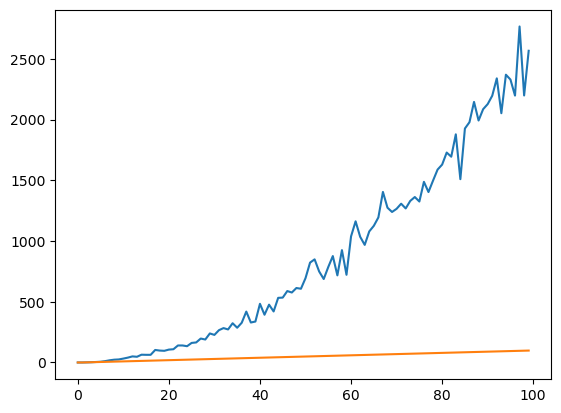

In [21]:
import matplotlib.pyplot as plt

insertion_counts = []
for N in range(100):
    a = list(range(N))
    random.shuffle(a)
    insertion_counts.append(insertion_sort(a))


quick_counts = []
for N in range(100):
    a = list(range(N))
    # random.shuffle(a)
    quick_counts.append(insertion_sort(a))

plt.plot(insertion_counts)
plt.plot(quick_counts)